In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing and converting .dat files

#df = pd.read_csv('u11_49T170U32_84.dat', delimiter='\t')

#data = np.genfromtxt('/Users/larsbaltensperger/Desktop/Physikpraktikum3/Franck_Hertz/plot1/u11_49T170U32_84.dat',dtype=None,delimiter=',')

data1 = np.genfromtxt('/Users/larsbaltensperger/Desktop/Physikpraktikum3/Franck_Hertz/Measurement/1.txt')
data2 = np.genfromtxt('/Users/larsbaltensperger/Desktop/Physikpraktikum3/Franck_Hertz/Measurement/2.txt')
data3 = np.genfromtxt('/Users/larsbaltensperger/Desktop/Physikpraktikum3/Franck_Hertz/Measurement/3.txt')
data4 = np.genfromtxt('/Users/larsbaltensperger/Desktop/Physikpraktikum3/Franck_Hertz/Measurement/4.txt')
data5 = np.genfromtxt('/Users/larsbaltensperger/Desktop/Physikpraktikum3/Franck_Hertz/Measurement/5.txt')

#print(data.shape)
#print(data)

#print(data[:,0])

u2_1 = data1[:,1]*10
uA_1 = data1[:,2]

u2_2 = data2[:,1]*10
uA_2 = data2[:,2]

u2_3 = data3[:,1]*10
uA_3 = data3[:,2]

u2_4 = data4[:,1]*10
uA_4 = data4[:,2]

u2_5 = data5[:,1]*10
uA_5 = data5[:,2]

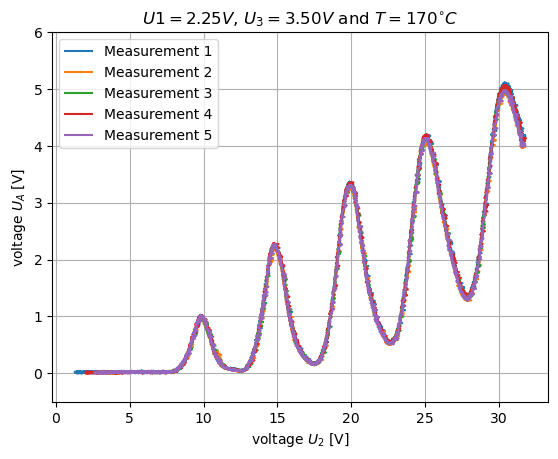

In [3]:
plt.title('$U1 = 2.25V$, $U_{3} = 3.50V$ and $T = 170 ^{\circ} C$')
plt.plot(u2_1,uA_1,label='Measurement 1')
plt.plot(u2_2,uA_2,label='Measurement 2')
plt.plot(u2_3,uA_3,label='Measurement 3')
plt.plot(u2_4,uA_4,label='Measurement 4')
plt.plot(u2_5,uA_5,label='Measurement 5')
plt.xlabel('voltage $U_{2}$ [V]')
plt.ylabel('voltage $U_{A}$ [V]')
plt.ylim(-0.5,6)
plt.legend()
plt.grid()
plt.savefig('measurment.png')

# Finding Peaks of all 5 measurements

In [4]:
print(len(uA_1))
print(len(u2_1))

5206
5206


In [5]:
import scipy as sc

In [6]:
peaks1 = sc.signal.find_peaks(uA_5,distance = 750, height = 0.5)

peaks = peaks1[0]

In [7]:
print(len(peaks1[0]))
print(peaks1[0])

5
[1244 2063 2891 3700 4530]


[ 9.80000019 14.77499962 19.97499943 25.22500038 30.39999962]


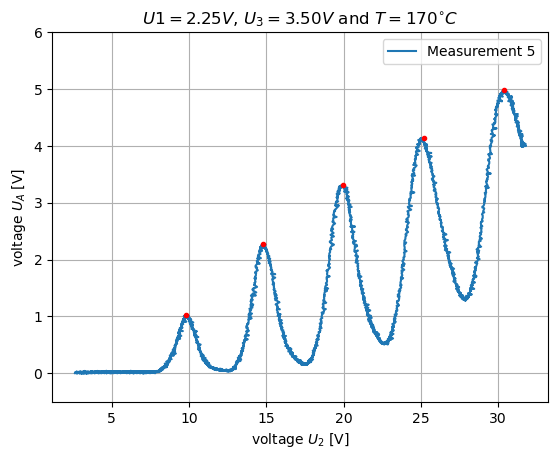

In [8]:
plt.title('$U1 = 2.25V$, $U_{3} = 3.50V$ and $T = 170 ^{\circ} C$')
#plt.plot(u2_1,uA_1,label='Measurement 1')
#plt.plot(u2_2,uA_2,label='Measurement 2')
#plt.plot(u2_3,uA_3,label='Measurement 3')
#plt.plot(u2_4,uA_4,label='Measurement 4')
plt.plot(u2_5,uA_5,label='Measurement 5')
plt.plot(u2_5[peaks],uA_5[peaks],'r.')
plt.xlabel('voltage $U_{2}$ [V]')
plt.ylabel('voltage $U_{A}$ [V]')
plt.ylim(-0.5,6)
plt.legend()
plt.grid()
#plt.savefig('measurment.png')

print(u2_5[peaks])

In [9]:
peak_data1 = [9.87500012, 14.75000024, 19.87499952, 25.07499933, 30.37499905]
peak_data2 = [9.77500012, 14.75000024, 19.97499943, 24.94999886, 30.42500019]
peak_data3 = [9.85000014, 14.80000019, 19.92499947, 25.0,        30.39999962]
peak_data4 = [9.77500021, 14.77499962, 20.15000105, 25.12500048, 30.29999971]
peak_data5 = [9.80000019, 14.77499962, 19.97499943, 25.22500038, 30.39999962]



peak_data = np.array([peak_data1,peak_data2,peak_data3,peak_data4,peak_data5])

In [10]:
print(peak_data[:,0])

[9.87500012 9.77500012 9.85000014 9.77500021 9.80000019]


In [11]:
#calculating mean peaks

mean_peaks = []
std_peaks = []

for i in range(5):
    mean_peaks.append(np.mean(peak_data[:,i]))
    std_peaks.append(np.std(peak_data[:,i]))
                    

print(np.round(mean_peaks,3))
print(np.round(std_peaks,3))

[ 9.815 14.77  19.98  25.075 30.38 ]
[0.041 0.019 0.093 0.096 0.043]


In [12]:
import uncertainties
from uncertainties import unumpy

In [13]:
final_peaks = unumpy.uarray(mean_peaks, std_peaks)

print(final_peaks)

[9.815000156+/-0.04062017257473654
 14.769999982000002+/-0.018708204619569797
 19.97999978+/-0.09273675377327141 25.07499981+/-0.09617738507772282
 30.379999637999997+/-0.043011725379612106]


In [14]:
diff = np.diff(final_peaks)


print(np.round(unumpy.nominal_values(diff),3))
print(np.round(unumpy.std_devs(diff),3))



[4.955 5.21  5.095 5.305]
[0.045 0.095 0.134 0.105]


In [15]:
from scipy.stats import linregress

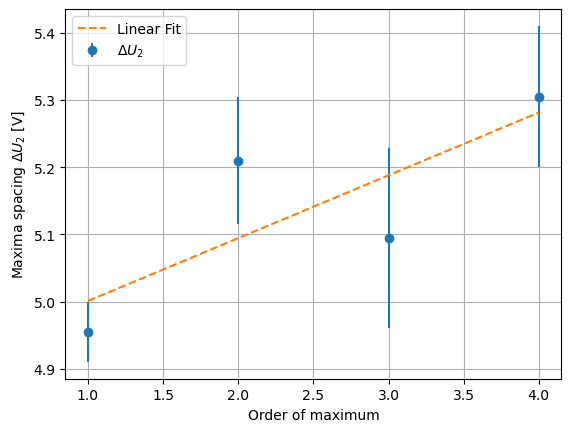

In [16]:
#create plot with linear fit
order = np.array([1,2,3,4])

diff_vals = unumpy.nominal_values(diff)
diff_std = unumpy.std_devs(diff)

# Calculate the linear fit
slope1, intercept1, r_value, p_value, std_err1 = linregress(order, diff_vals)

# Create the plot
plt.errorbar(order, diff_vals, yerr=diff_std, fmt='o', label='$\Delta U_{2}$')
plt.plot(order, slope1*order + intercept1, '--', label='Linear Fit')

# Add labels and legend
plt.xlabel('Order of maximum')
plt.ylabel('Maxima spacing $\Delta U_{2}$ [V]')
plt.legend(loc='upper left')
plt.grid()

plt.savefig('max_fit.png')
# Show the plot
plt.show()



# Finding the minima

In [17]:
mins1 = sc.signal.find_peaks(-uA_5,distance = 700)

mins = mins1[0]

print(len(mins1[0]))
print(mins1[0])


7
[   1  709 1673 2507 3331 4140 5017]


[ 2.5999999   6.85000002 12.57500053 17.45000005 22.87499905 27.85000086
 31.54999971]


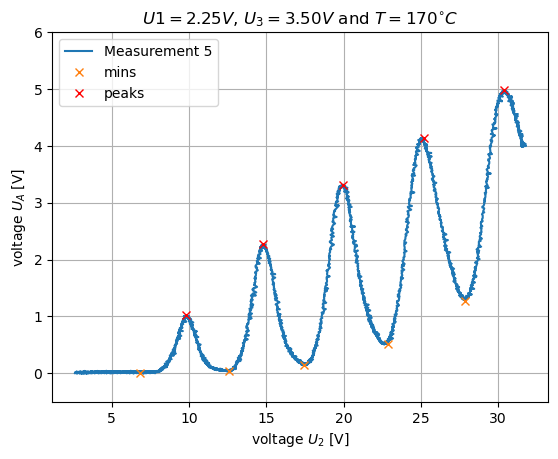

In [18]:
mins2 = mins[1:6]

plt.title('$U1 = 2.25V$, $U_{3} = 3.50V$ and $T = 170 ^{\circ} C$')
#plt.plot(u2_1,uA_1,label='Measurement 1')
#plt.plot(u2_2,uA_2,label='Measurement 2')
#plt.plot(u2_3,uA_3,label='Measurement 3')
#plt.plot(u2_4,uA_4,label='Measurement 4')
plt.plot(u2_5,uA_5,label='Measurement 5')
plt.plot(u2_5[mins2],uA_5[mins2],'x',label='mins')
plt.plot(u2_5[peaks],uA_5[peaks],'rx',label='peaks')
plt.xlabel('voltage $U_{2}$ [V]')
plt.ylabel('voltage $U_{A}$ [V]')
plt.ylim(-0.5,6)
plt.legend()
plt.grid()
plt.savefig('mins_peaks.png')

print(u2_5[mins])

In [19]:
min_data1 = [7.09999979, 12.32499957, 17.5999999,  22.5,        27.99999952]
min_data2 = [7.97500014, 12.35000014, 17.5,        22.57499933, 27.89999962]
min_data3 = [6.80000007, 12.5,        17.5999999,  22.72500038, 27.89999962]
min_data4 = [7.8500014, 12.37499952, 17.42499947, 22.67499924, 27.77499914]
min_data5 = [6.85000002, 12.57500053, 17.45000005, 22.87499905, 27.85000086]



min_data = np.array([min_data1,min_data2,min_data3,min_data4,min_data5])

In [20]:
#calculating mean mins

mean_min = []
std_min = []

for i in range(5):
    mean_min.append(np.mean(min_data[:,i]))
    std_min.append(np.std(min_data[:,i]))
                    

print(np.round(mean_min,3))
print(np.round(std_min,3))

[ 7.315 12.425 17.515 22.67  27.885]
[0.5   0.096 0.073 0.129 0.073]


In [21]:
final_mins = unumpy.uarray(mean_min, std_min)

print(final_mins)

[7.315000284+/-0.4999003265455274 12.424999951999999+/-0.09617720312080671
 17.514999864+/-0.07348476699318181
 22.669999599999997+/-0.12884081030579805
 27.884999752+/-0.07348468657032009]


In [22]:
diff_min = np.diff(final_mins)


print(np.round(unumpy.nominal_values(diff_min),3))
print(np.round(unumpy.std_devs(diff_min),3))

[5.11  5.09  5.155 5.215]
[0.509 0.121 0.148 0.148]


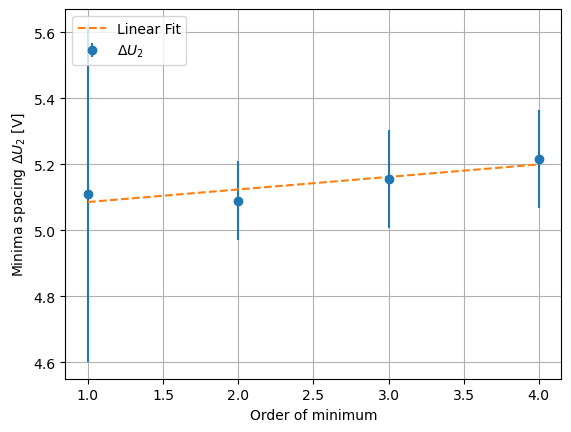

In [23]:
#create plot with linear fit
order = np.array([1,2,3,4])

diff_vals = unumpy.nominal_values(diff_min)
diff_std = unumpy.std_devs(diff_min)

# Calculate the linear fit
slope2, intercept2, r_value, p_value, std_err2 = linregress(order, diff_vals)

# Create the plot
plt.errorbar(order, diff_vals, yerr=diff_std, fmt='o', label='$\Delta U_{2}$')
plt.plot(order, slope2*order + intercept2, '--', label='Linear Fit')

# Add labels and legend
plt.xlabel('Order of minimum')
plt.ylabel('Minima spacing $\Delta U_{2}$ [V]')
plt.legend(loc='upper left')
plt.grid()

plt.savefig('min_fit.png')
# Show the plot
plt.show()

# Calculating the Planck constants

In [32]:
import scipy.constants as const
from uncertainties import ufloat

c = const.c
e = const.e
h = const.h
wavelength = 2537e-10 #meters


In [36]:
#calculating minimum transition energy by interpolation with fit results


#fit results for peaks
slope_peak = ufloat(slope1,std_err1)
peaks_Emin = slope_peak * 0.5 + intercept1

print(peaks_Emin)

#fit results for peaks
slope_trough = ufloat(slope2,std_err2)
troughs_Emin = slope_trough * 0.5 + intercept2

print(troughs_Emin)

4.954+/-0.025
5.066+/-0.007
6.62607015e-34


In [38]:
h_peak = (peaks_Emin * wavelength * e)/c

print(h_peak)
print(h_peak/h)
print((h_peak/h - 1) * 100)

h_trough = (troughs_Emin * wavelength * e)/c

print(h_trough)
print(h_trough/h)
print((h_trough/h - 1) * 100)

print(h)

(6.717+/-0.034)e-34
1.014+/-0.005
1.4+/-0.5
(6.869+/-0.010)e-34
1.0367+/-0.0014
3.67+/-0.14
6.62607015e-34
